In [ ]:
!pip install wget
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

--2021-12-11 00:13:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.2’

adult.data.2        100%[===================>]   3.79M  9.03MB/s    in 0.4s    

2021-12-11 00:13:38 (9.03 MB/s) - ‘adult.data.2’ saved [3974305/3974305]



In [ ]:
import pandas as pd
import numpy as np

names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income-category"]
df = pd.read_csv('adult.data', sep=",", header=None)
df.columns = names

In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# calculate total number of values with Nan or null in a column
df.applymap(lambda x: pd.isnull(x)).sum()

age                0
workclass          0
fnlwgt             0
education          0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income-category    0
dtype: int64

In [ ]:
# calculate total number of values with Nan or null in a column
df.applymap(lambda x: not x).sum()

age                    0
workclass              0
fnlwgt                 0
education              0
education-num          0
marital-status         0
occupation             0
relationship           0
race                   0
sex                    0
capital-gain       29849
capital-loss       31042
hours-per-week         0
native-country         0
income-category        0
dtype: int64

In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
mean_std_df = df.describe(include='all').loc[['mean','std']]

In [ ]:
mean_std_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-category
mean,38.581647,NaN,189778.366512,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,105549.977697,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN


In [ ]:
#third quartile value
q3 = df.describe(include='all').loc['75%']
q3

age                    48
workclass             NaN
fnlwgt             237051
education             NaN
education-num          12
marital-status        NaN
occupation            NaN
relationship          NaN
race                  NaN
sex                   NaN
capital-gain            0
capital-loss            0
hours-per-week         45
native-country        NaN
income-category       NaN
Name: 75%, dtype: object

In [ ]:
#first quartile value
q1 = df.describe(include='all').loc['25%']
q1

age                    28
workclass             NaN
fnlwgt             117827
education             NaN
education-num           9
marital-status        NaN
occupation            NaN
relationship          NaN
race                  NaN
sex                   NaN
capital-gain            0
capital-loss            0
hours-per-week         40
native-country        NaN
income-category       NaN
Name: 25%, dtype: object

In [ ]:
#interquartile range
iqr = q3 - q1
iqr

age                    20
workclass             NaN
fnlwgt             119224
education             NaN
education-num           3
marital-status        NaN
occupation            NaN
relationship          NaN
race                  NaN
sex                   NaN
capital-gain            0
capital-loss            0
hours-per-week          5
native-country        NaN
income-category       NaN
dtype: object

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   education-num    32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income-category  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df['income-category'] = df['income-category'].str.strip().map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Identify Numeric features
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','income-category']

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

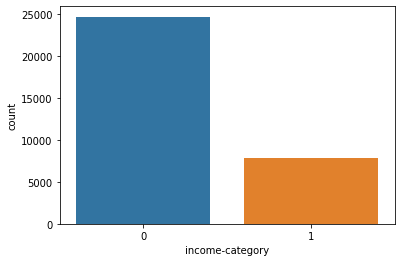

In [ ]:
# Count of >50K & <=50K
sns.countplot(x=df['income-category'],label="Count")
plt.show()

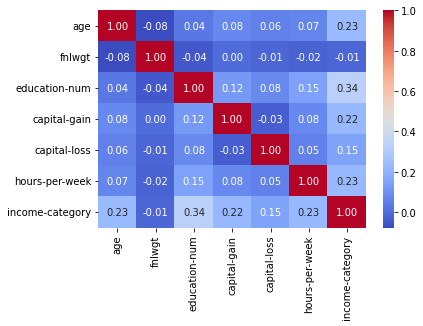

In [ ]:
# Correlation matrix between numerical values
g = sns.heatmap(df[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

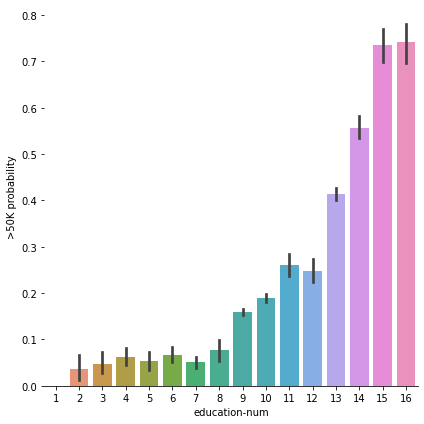

In [ ]:
# Explore Education Num vs Income
g = sns.catplot(x="education-num",y="income-category",data=df,kind="bar",height = 6)
g.despine(left=True)
g = g.set_ylabels(">50K probability")

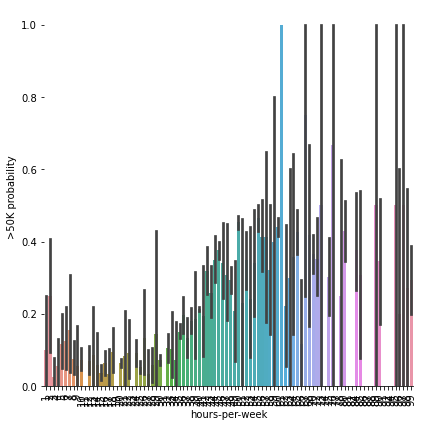

In [ ]:
# Explore Hours Per Week vs Income
g  = sns.catplot(x="hours-per-week",y="income-category",data=df,kind="bar",height = 6)
g.despine(left=True)
g = g.set_ylabels(">50K probability")
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


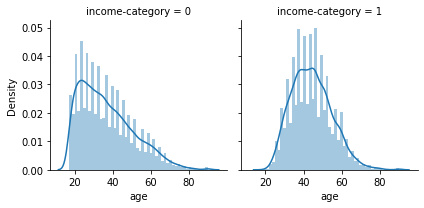

In [ ]:
# Explore Age vs Income
g = sns.FacetGrid(df, col='income-category')
g = g.map(sns.distplot, "age")
plt.show()

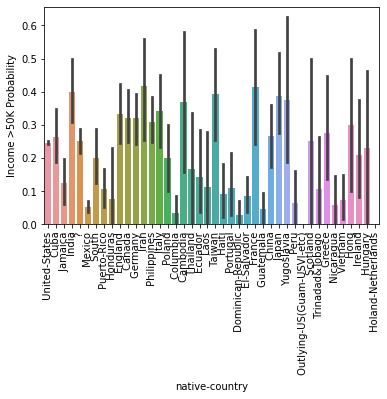

In [ ]:
# Explore Native Nation vs Income
g = sns.barplot(x="native-country",y="income-category",data=df)
g = g.set_ylabel("Income >50K Probability")
plt.xticks(rotation=90)
plt.show()

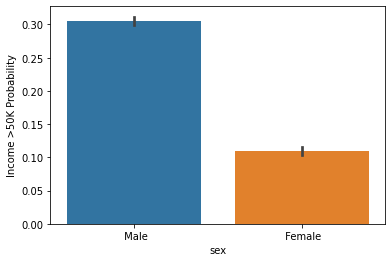

In [ ]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income-category",data=df)
g = g.set_ylabel("Income >50K Probability")
plt.show()

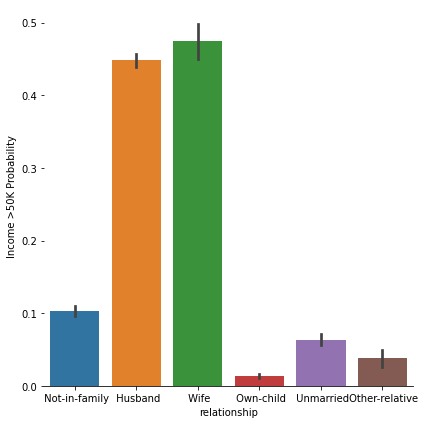

In [ ]:
# Explore Relationship vs Income
g = sns.catplot(x="relationship",y="income-category",data=df,kind="bar", height = 6)
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

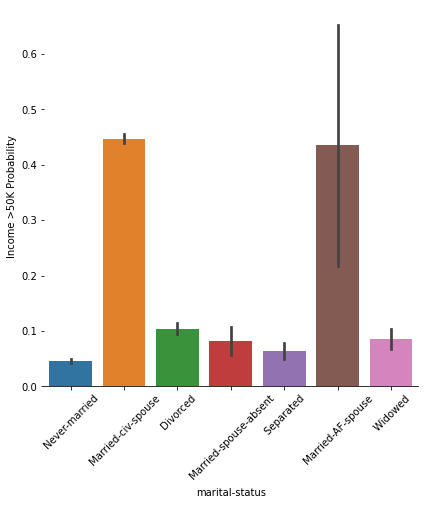

In [ ]:
# Explore Marital Status vs Income
g = sns.catplot(x="marital-status",y="income-category",data=df,kind="bar", height = 6)
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.xticks(rotation=45)
plt.show()

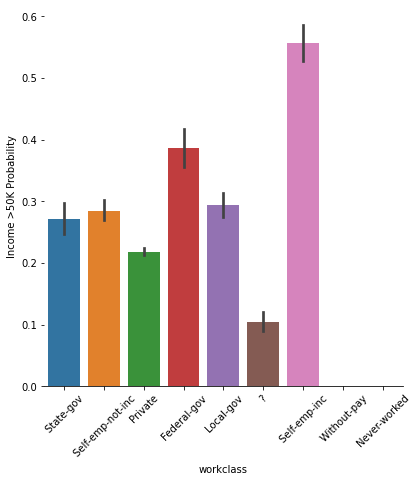

In [ ]:
# Explore Workclass vs Income
g = sns.catplot(x="workclass",y="income-category",data=df,kind="bar", height = 6)
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# income-category is the variable we are trying to predict
X = df.drop(['income-category'], axis=1)

y = df['income-category']

In [ ]:
# test train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#transform categories from string to numbers
from sklearn import preprocessing

categories = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for feature in categories:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [ ]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.189281,0.090246,-0.143997,-2.405146,-1.192884,-1.738428,1.763911,-0.278059,0.395726,0.702490,-0.145891,-0.216579,-0.034732,0.290065
1,-0.262660,0.090246,0.082715,0.179298,-0.415106,0.915029,-0.602713,-0.278059,0.395726,-1.423508,-0.145891,-0.216579,1.107450,0.290065
2,-0.042523,0.090246,-1.295350,-0.337591,1.140451,0.915029,-1.312701,-0.278059,0.395726,-1.423508,-0.145891,-0.216579,0.781113,0.290065
3,0.838021,0.090246,-0.485935,0.179298,-0.415106,-0.411699,1.290586,2.215831,-1.953378,-1.423508,-0.145891,-0.216579,-0.034732,0.290065
4,2.158837,1.466952,-0.688671,-0.596035,0.362672,-0.411699,0.817261,-0.901532,0.395726,0.702490,-0.145891,5.092257,-0.034732,0.290065
